In [ ]:
# About problem statement

In [ ]:
'''
Your client is a multi-national financial company, which offers multiple products to the consumers. There are multiple channels
to offer these products to consumers although major contribution is coming from offline distribution channel. Offline channel
sells Financial products to consumers via their agent network and as per government regulation these agents must be certified
to sell financial products. There are multiple certification programs against different categories of financial products. 

As this offline channel shares major contribution to total company sales, company focuses on recruitment and certify them to
build large agent network. Here, major challenge is training them to get the certifications to sell various type of products.

You are given a dataset of trainee performance for the training curriculum test wise within multiple programs. Your task is to 
predict the performance on such tests given the demographic information and training program/test details. This will enable 
your client to strengthen its training problem by figuring out the most important factors that lead to a better engagement and 
performance for a trainee.

Evaluation Metric
The evaluation metric for this competition is AUC ROC score.
'''

In [ ]:
# Importing required libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,roc_curve,r2_score,auc ,accuracy_score,confusion_matrix,classification_report,recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Loading dataset

In [39]:
df=pd.read_csv("C://Users//acer//Desktop//1sem//python//ML Start//train.csv")

In [ ]:
# Lets see our train dataset

In [3]:
df.head(3)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1


In [4]:
df.tail(3)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
73144,13063_142,Y_2,Y,120,142,online,easy,13063,M,Matriculation,2,NaN,3,N,4.0,1
73145,5667_82,V_3,V,131,82,offline,intermediate,5667,M,High School Diploma,3,27.0,2,N,2.0,1
73146,4467_119,Y_4,Y,121,119,online,easy,4467,F,High School Diploma,3,31.0,2,N,4.0,1


In [ ]:
# listing all column

In [5]:
df.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [ ]:
# A detailed info about dataset

In [6]:
pd.DataFrame({"TotalMissing":df.isna().sum(),"%Missing":df.isna().mean(),"DataType":df.dtypes,"Unique":df.nunique()})

,TotalMissing,%Missing,DataType,Unique
id,0,0.000000,object,73147
program_id,0,0.000000,object,22
program_type,0,0.000000,object,7
program_duration,0,0.000000,int64,10
test_id,0,0.000000,int64,188
test_type,0,0.000000,object,2
difficulty_level,0,0.000000,object,4
trainee_id,0,0.000000,int64,18500
gender,0,0.000000,object,2
education,0,0.000000,object,5


In [ ]:
# shape of dataset

In [7]:
df.shape

(73147, 16)

In [ ]:
# basic stats 

In [22]:
df.describe(include="all")

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
count,73147,73147,73147,73147.000000,73147.000000,73147,73147,73147.000000,73147,73147,73147.000000,45418.000000,73147.000000,73147,73070.000000,73147.000000
unique,73147,22,7,NaN,NaN,2,4,NaN,2,5,NaN,NaN,NaN,2,NaN,NaN
top,4050_113,Y_1,Y,NaN,NaN,offline,easy,NaN,M,High School Diploma,NaN,NaN,NaN,N,NaN,NaN
freq,1,6687,22560,NaN,NaN,43543,40101,NaN,39043,34371,NaN,NaN,NaN,66577,NaN,NaN
mean,NaN,NaN,NaN,128.208676,91.079306,NaN,NaN,9843.079620,NaN,NaN,2.246845,36.494033,2.583934,NaN,2.395634,0.695408
std,NaN,NaN,NaN,6.889679,51.239048,NaN,NaN,5703.556093,NaN,NaN,1.011587,9.041119,1.240816,NaN,1.325288,0.460238
min,NaN,NaN,NaN,117.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,17.000000,1.000000,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,121.000000,45.000000,NaN,NaN,5040.000000,NaN,NaN,1.000000,28.000000,2.000000,NaN,1.000000,0.000000
50%,NaN,NaN,NaN,131.000000,90.000000,NaN,NaN,9641.000000,NaN,NaN,2.000000,39.000000,2.000000,NaN,2.000000,1.000000
75%,NaN,NaN,NaN,134.000000,135.000000,NaN,NaN,14552.000000,NaN,NaN,3.000000,45.000000,3.000000,NaN,4.000000,1.000000


In [ ]:
# Lets load test dataset

In [40]:
fd=pd.read_csv("C://Users//acer//Desktop//1sem//python//ML Start//test.csv")

In [ ]:
# Lets see test dataset

In [9]:
fd.head(3)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0


In [10]:
fd.tail(3)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
31346,7010_157,Y_1,Y,136,157,online,easy,7010,M,Bachelors,2,NaN,3,N,4.0
31347,14895_179,Z_1,Z,136,179,offline,easy,14895,F,Matriculation,3,NaN,1,N,1.0
31348,9004_107,X_2,X,121,107,offline,hard,9004,M,Matriculation,1,26.0,4,N,3.0


In [ ]:
# shape of dataset

In [11]:
fd.shape

(31349, 15)

In [ ]:
# A detailed summary of test dataset

In [12]:
pd.DataFrame({"TotalMissing":fd.isna().sum(),"%Missing":fd.isna().mean(),"DataType":fd.dtypes,"Unique":fd.nunique()})

,TotalMissing,%Missing,DataType,Unique
id,0,0.000000,object,31349
program_id,0,0.000000,object,22
program_type,0,0.000000,object,7
program_duration,0,0.000000,int64,10
test_id,0,0.000000,int64,188
test_type,0,0.000000,object,2
difficulty_level,0,0.000000,object,4
trainee_id,0,0.000000,int64,14779
gender,0,0.000000,object,2
education,0,0.000000,object,5


In [ ]:
# basic stats

In [24]:
fd.describe(include="all")

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
count,31349,31349,31349,31349.000000,31349.000000,31349,31349,31349.000000,31349,31349,31349.000000,19558.000000,31349.000000,31349,31318.000000
unique,31349,22,7,NaN,NaN,2,4,NaN,2,5,NaN,NaN,NaN,2,NaN
top,19528_140,Y_3,Y,NaN,NaN,offline,easy,NaN,M,High School Diploma,NaN,NaN,NaN,N,NaN
freq,1,2966,9744,NaN,NaN,18713,17110,NaN,16830,14612,NaN,NaN,NaN,28670,NaN
mean,NaN,NaN,NaN,128.211043,90.607196,NaN,NaN,9853.374302,NaN,NaN,2.252289,36.440894,2.591566,NaN,2.402772
std,NaN,NaN,NaN,6.900161,51.174130,NaN,NaN,5714.103785,NaN,NaN,1.012264,9.055208,1.232798,NaN,1.331425
min,NaN,NaN,NaN,117.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,17.000000,1.000000,NaN,1.000000
25%,NaN,NaN,NaN,121.000000,45.000000,NaN,NaN,5042.000000,NaN,NaN,1.000000,28.000000,2.000000,NaN,1.000000
50%,NaN,NaN,NaN,131.000000,89.000000,NaN,NaN,9663.000000,NaN,NaN,2.000000,39.000000,2.000000,NaN,2.000000
75%,NaN,NaN,NaN,134.000000,134.000000,NaN,NaN,14568.000000,NaN,NaN,3.000000,45.000000,3.000000,NaN,4.000000


In [ ]:
# EDA 

In [ ]:
# Univariate analysis

In [ ]:
# Lets see how target is distributed

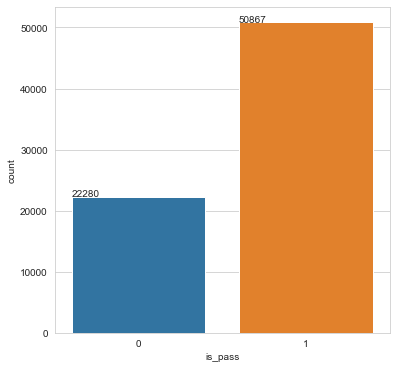

In [20]:
figure=plt.figure(figsize=(6,6))
fig=sns.countplot(x=df.is_pass)
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))
plt.savefig("ML-targetdist.png")

In [ ]:
# Here we are concating both train and test dataset in order to save time of processing 

In [41]:
df=pd.concat([df,fd],axis=0,sort=False)

In [ ]:
# Lets impute missing values in age and trainee_engagement_rating columns

In [ ]:
# Before imputing missing values with mean lets see the distribution of these two variables

In [10]:
df.age.describe(),df.trainee_engagement_rating.describe()

(count    64976.000000
 mean        36.478038
 std          9.045325
 min         17.000000
 25%         28.000000
 50%         39.000000
 75%         45.000000
 max         63.000000
 Name: age, dtype: float64, count    104388.000000
 mean          2.397776
 std           1.327130
 min           1.000000
 25%           1.000000
 50%           2.000000
 75%           4.000000
 max           5.000000
 Name: trainee_engagement_rating, dtype: float64)

In [ ]:
# we can say that both are near about normaldistributed as mean and median looks at center lets visualize to support this

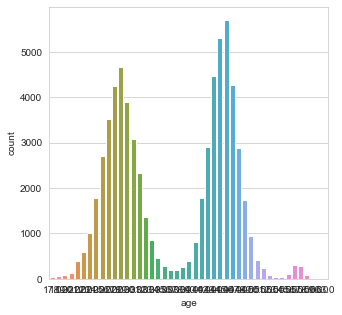

In [14]:
figure=plt.figure(figsize=(5,5))
fig=sns.countplot(df.age)
plt.savefig("ml-agedist.png")

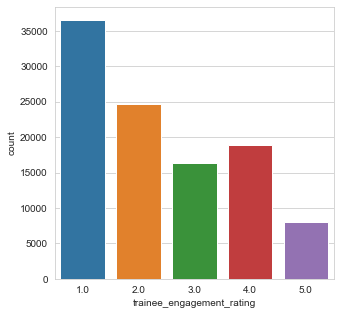

In [15]:
figure=plt.figure(figsize=(5,5))
fig=sns.countplot(df.trainee_engagement_rating)
plt.savefig("ml-tranieedist.png")

In [ ]:
# Lets impute null values with mean and mode

In [42]:
df.age.fillna(df.age.mean(),inplace=True)

In [ ]:
# Lets round off the mean age as we have age in int

In [43]:
df.age=np.round(df.age,0)

In [ ]:
# As trainee column contains int values we will be imputing na values with mode

In [44]:
df.trainee_engagement_rating.fillna(df.trainee_engagement_rating.value_counts().sort_values(ascending=False).index[0],inplace=True)

In [ ]:
# Lets explore dataset in our EDA section

In [28]:
pd.DataFrame({"TotalMissing":df.isna().sum(),"%Missing":df.isna().mean(),"DataType":df.dtypes,"Unique":df.nunique()})

,TotalMissing,%Missing,DataType,Unique
id,0,0.000000,object,104496
program_id,0,0.000000,object,22
program_type,0,0.000000,object,7
program_duration,0,0.000000,int64,10
test_id,0,0.000000,int64,188
test_type,0,0.000000,object,2
difficulty_level,0,0.000000,object,4
trainee_id,0,0.000000,int64,19422
gender,0,0.000000,object,2
education,0,0.000000,object,5


In [ ]:
# dropping id column as it has no role to play

In [45]:
df.drop("id",axis=1,inplace=True)

In [ ]:
# Lets see distribution of all columns

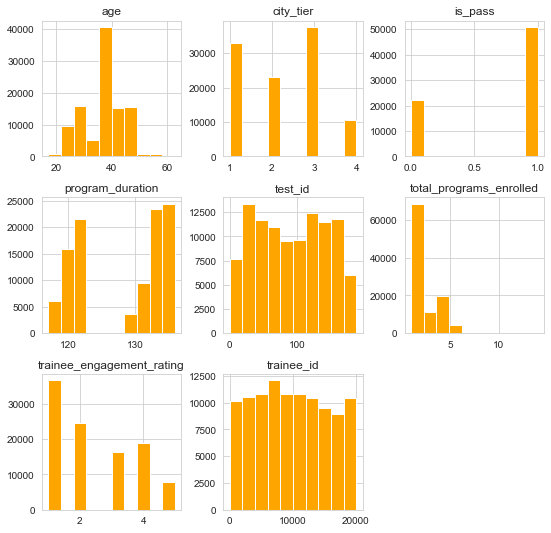

In [39]:
df.hist(figsize=(9,9),color="orange")
plt.savefig("ml-hist.png")
plt.show()

In [ ]:
# Programe id

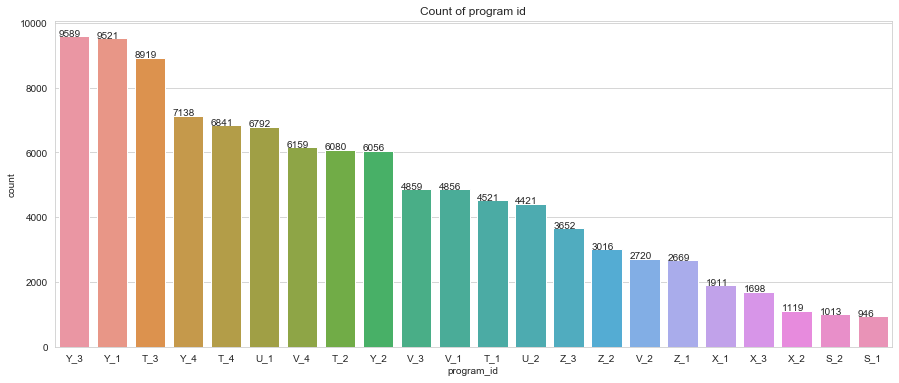

In [20]:
figure=plt.figure(figsize=(15,6))
fig=sns.countplot(df.program_id,order=df['program_id'].value_counts().index)
plt.title("Count of program id")
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))
plt.savefig("ml-programid.png")

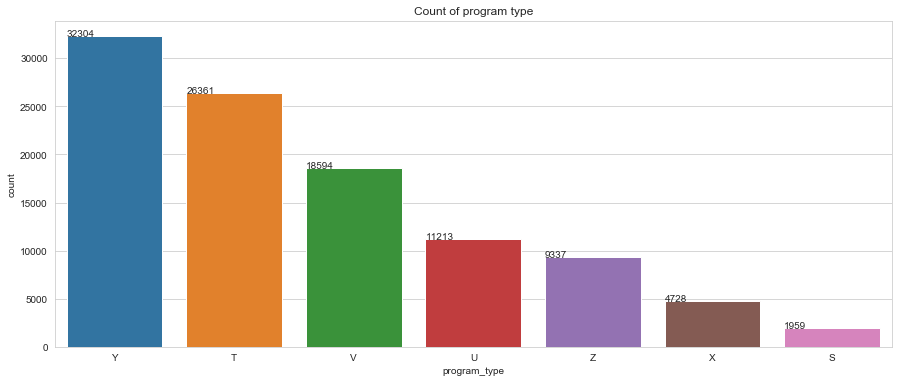

In [21]:
figure=plt.figure(figsize=(15,6))
fig=sns.countplot(df.program_type,order=df['program_type'].value_counts().index)
plt.title("Count of program type")
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))
plt.savefig("ml-programtype.png")

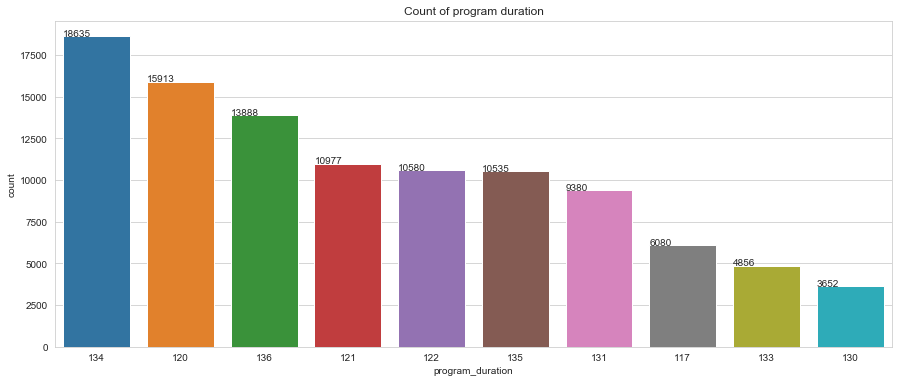

In [22]:
figure=plt.figure(figsize=(15,6))
fig=sns.countplot(df.program_duration,order=df['program_duration'].value_counts().index)
plt.title("Count of program duration")
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))
plt.savefig("ml-programdur.png")

In [ ]:
# To plot all object variable in one line code

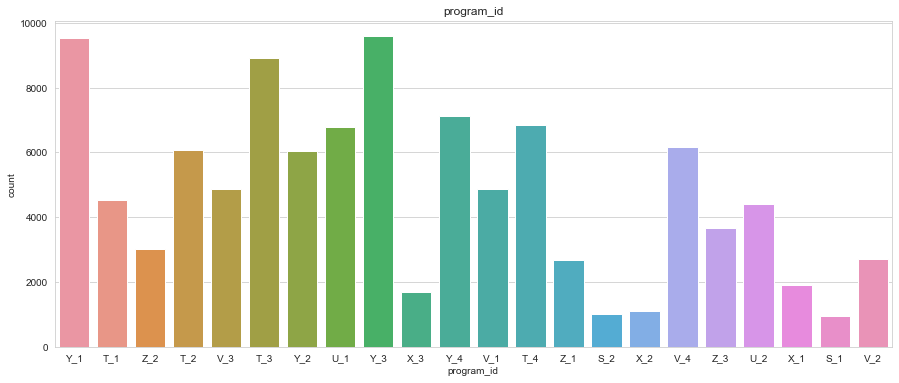

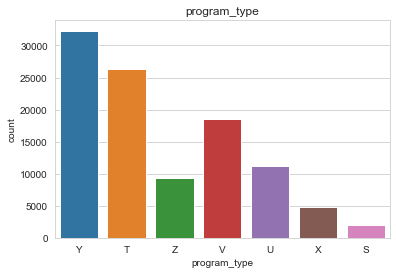

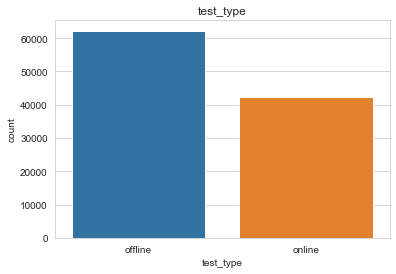

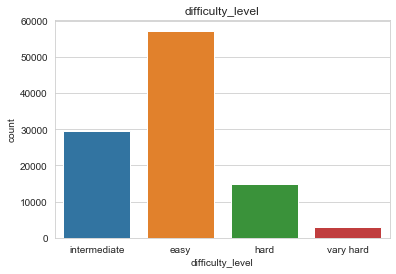

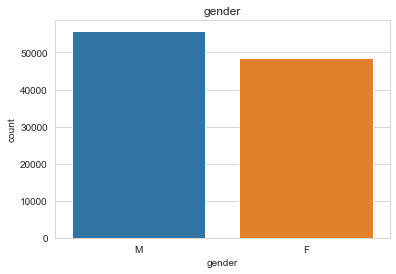

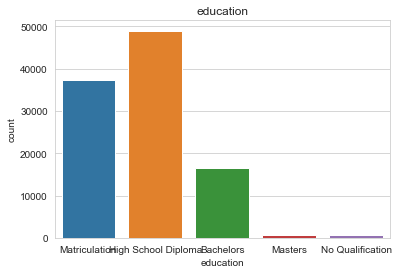

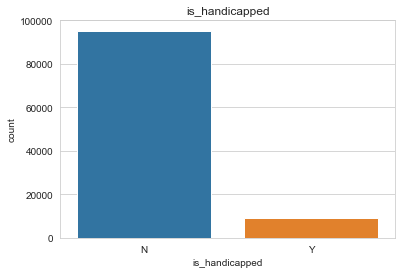

In [46]:
figure=plt.figure(figsize=(15,6))
for feature in df.columns:
    if df[feature].dtypes in (["object"]):
        fig=sns.countplot(df[feature])
        plt.xlabel(feature)
        plt.title(feature)
        plt.show()

In [ ]:
# Bivariate analysis

In [49]:
df.groupby('city_tier')['is_pass'].agg(['min','max','mean','median','std'])

,min,max,mean,median,std
city_tier,,,,,
1,0.0,1.0,0.732702,1.0,0.442559
2,0.0,1.0,0.696994,1.0,0.459572
3,0.0,1.0,0.683879,1.0,0.464970
4,0.0,1.0,0.617070,1.0,0.486134


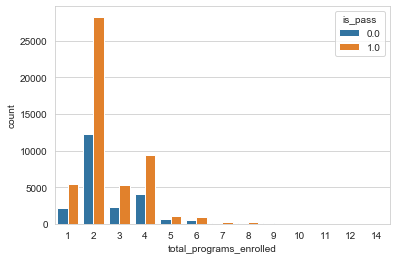

In [52]:
sns.countplot(x=df["total_programs_enrolled"],hue=df.is_pass,data=df)

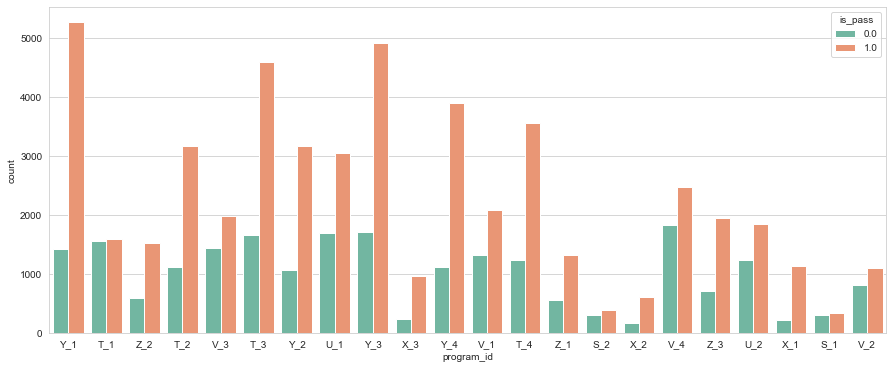

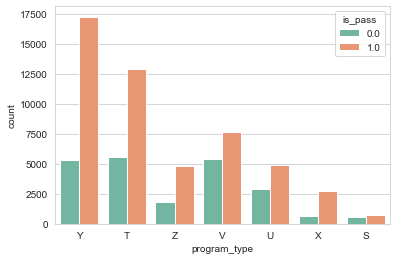

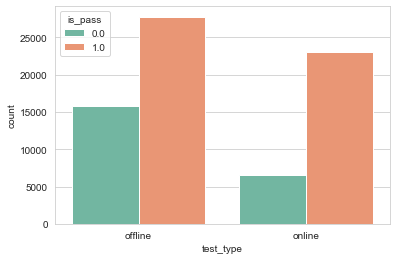

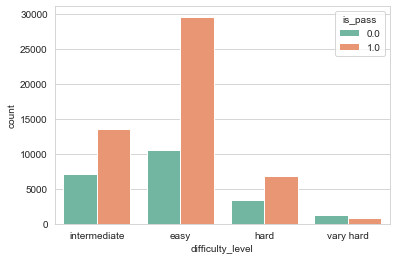

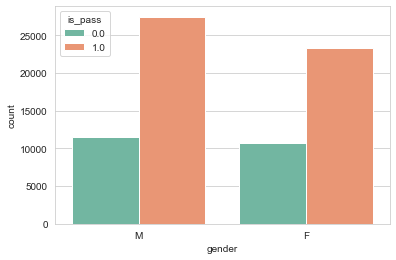

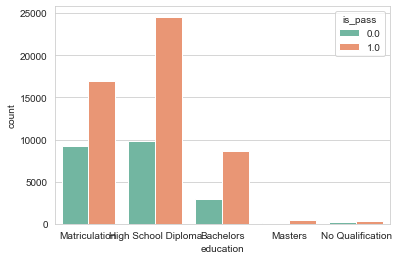

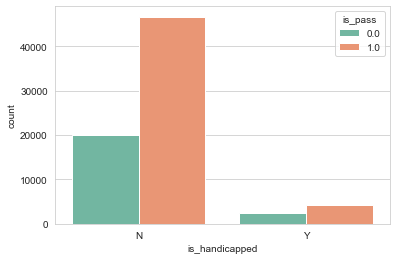

In [54]:
fig=plt.figure(figsize=(15,6))
for feature in df.columns:
    if df[feature].dtypes in (["object"]):
        sns.countplot(df[feature],hue="is_pass",data=df,palette="Set2")
        plt.xlabel(feature)
        plt.show()

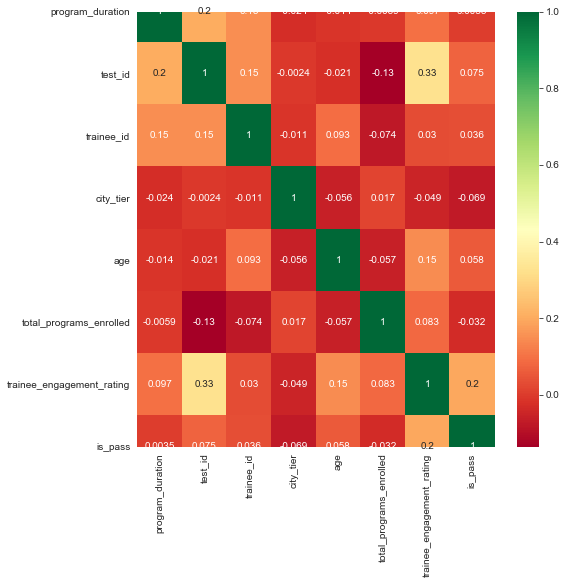

In [56]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [50]:
df["program_id"]=le.fit_transform(df["program_id"])
df["program_type"]=le.fit_transform(df["program_type"])
df["test_type"]=le.fit_transform(df["test_type"])
df["gender"]=le.fit_transform(df["gender"])
df["is_handicapped"]=le.fit_transform(df["is_handicapped"])

In [ ]:
# Lets do some manual encoding for these 2 cols

In [53]:
df.difficulty_level.unique()

array(['intermediate', 'easy', 'hard', 'vary hard'], dtype=object)

In [54]:
df.education.unique()

array(['Matriculation', 'High School Diploma', 'Bachelors', 'Masters',
       'No Qualification'], dtype=object)

In [55]:
diff={'easy':0,'intermediate':1,'hard':2,'vary hard':3}
df["difficulty_level"]=df["difficulty_level"].map(diff)

In [57]:
edu={'No Qualification':0,'Matriculation':1,'High School Diploma':2,'Bachelors':3,'Masters':4}
df["education"]=df["education"].map(edu)

In [ ]:
# Lets now separate our training and test dataset

In [64]:
df_train=df.iloc[:73147]
df_test=df.iloc[73147:]

In [ ]:
# dropping is pass col in test dataset

In [ ]:
df_test.drop(["is_pass"],axis=1,inplace=True)

In [ ]:
# Dividing train dataset into dependent and independent variable

In [74]:
y=df_train["is_pass"]
x=df_train.drop(["is_pass"],axis=1)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.02754855 0.01388431 0.0167726  0.18231987 0.02093584 0.02513873
 0.28843915 0.02306871 0.03985745 0.06451691 0.15039861 0.0604794
 0.0170329  0.06960696]


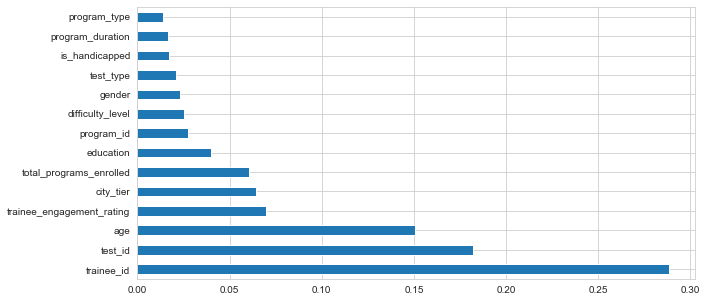

In [79]:
fig=plt.figure(figsize=(10,5))
model = RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

In [ ]:
'''
We can see that every variable has an impact in predicting target col
'''

In [ ]:
# splitting the dataset using train test split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
# Printing the shape of splitted dataset

In [84]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (51202, 14)
shape of y_train: (51202,)
shape of x_test: (21945, 14)
shape of y_test: (21945,)


In [ ]:
# Applying machine learning algorithm on train dataset

In [ ]:
# Extra trees classifier

In [115]:
etc=ExtraTreesClassifier(n_estimators=100)
etc.fit(x_train,y_train)
prediction=etc.predict(x_test)

In [ ]:
# Looking at the output 

In [100]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

       Act  Predicted
62458  1.0        0.0
18571  1.0        1.0
70396  1.0        1.0
10393  0.0        0.0
70129  1.0        1.0
...    ...        ...
32885  1.0        1.0
67956  1.0        1.0
68606  0.0        1.0
26316  0.0        1.0
40174  1.0        1.0

[21945 rows x 2 columns]


In [116]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.7282296650717703
Sensitiviy is : 0.8370487275596765
Precision is : 0.785013876040703
R2 score is: -0.2773169266789717
Area under curve is  :0.6598422622660359
[[ 3252  3486]
 [ 2478 12729]]
              precision    recall  f1-score   support

         0.0       0.57      0.48      0.52      6738
         1.0       0.79      0.84      0.81     15207

    accuracy                           0.73     21945
   macro avg       0.68      0.66      0.67     21945
weighted avg       0.72      0.73      0.72     21945



In [ ]:
# Bagging classifier

In [117]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
prediction=bc.predict(x_test)

In [ ]:
# Looking at the output 

In [94]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

       Act  Predicted
62458  1.0        1.0
18571  1.0        1.0
70396  1.0        1.0
10393  0.0        0.0
70129  1.0        1.0
...    ...        ...
32885  1.0        1.0
67956  1.0        1.0
68606  0.0        0.0
26316  0.0        1.0
40174  1.0        1.0

[21945 rows x 2 columns]


In [ ]:
# evaluating result

In [118]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 0.7330599225336067
Sensitiviy is : 0.8115999210889722
Precision is : 0.8048255624388654
R2 score is: -0.25461478143618654
Area under curve is  :0.6837014149820047
[[ 3745  2993]
 [ 2865 12342]]
              precision    recall  f1-score   support

         0.0       0.57      0.56      0.56      6738
         1.0       0.80      0.81      0.81     15207

    accuracy                           0.73     21945
   macro avg       0.69      0.68      0.68     21945
weighted avg       0.73      0.73      0.73     21945



In [ ]:
# cart

In [119]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

       Act  Predicted
69143  1.0        1.0
20195  0.0        1.0
37703  1.0        1.0
9158   1.0        1.0
57335  1.0        1.0
...    ...        ...
28485  1.0        1.0
31955  1.0        1.0
33234  0.0        1.0
49755  0.0        0.0
67688  1.0        1.0

[21945 rows x 2 columns]
accuracy score is 0.7042150831624516
Sensitiviy is : 0.7850989675807194
Precision is : 0.787429099063448
R2 score is: -0.3901851393482907
Area under curve is  :0.6533835591836514
[[ 3515  3223]
 [ 3268 11939]]
              precision    recall  f1-score   support

         0.0       0.52      0.52      0.52      6738
         1.0       0.79      0.79      0.79     15207

    accuracy                           0.70     21945
   macro avg       0.65      0.65      0.65     21945
weighted avg       0.70      0.70      0.70     21945



In [112]:
from sklearn.ensemble import AdaBoostClassifier

In [121]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
prediction=abc.predict(x_test)
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Sensitiviy is :",recall_score(y_test, prediction))
print("Precision is :",precision_score(y_test, prediction))
print("R2 score is:",r2_score(y_test,prediction))
fpr, tpr, thresholds = roc_curve(y_test,prediction)
print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

       Act  Predicted
69143  1.0        1.0
20195  0.0        1.0
37703  1.0        1.0
9158   1.0        1.0
57335  1.0        1.0
...    ...        ...
28485  1.0        1.0
31955  1.0        1.0
33234  0.0        0.0
49755  0.0        1.0
67688  1.0        1.0

[21945 rows x 2 columns]
accuracy score is 0.7154249259512417
Sensitiviy is : 0.9347668836719931
Precision is : 0.7301725909184302
R2 score is: -0.3374990286905062
Area under curve is  :0.577579345665026
[[ 1485  5253]
 [  992 14215]]
              precision    recall  f1-score   support

         0.0       0.60      0.22      0.32      6738
         1.0       0.73      0.93      0.82     15207

    accuracy                           0.72     21945
   macro avg       0.66      0.58      0.57     21945
weighted avg       0.69      0.72      0.67     21945



In [ ]:
# Lets use bagging classifier on test dataset

In [122]:
bc=BaggingClassifier()
bc.fit(x,y)
prediction=bc.predict(df_test)

In [ ]:
# displaying result

In [126]:
result=pd.DataFrame({"Predicted output":prediction})

In [ ]:
# Lets put these values as per our submission 

In [124]:
test=pd.read_csv("C://Users//acer//Desktop//1sem//python//ML Start//test.csv",usecols=["id"])

In [ ]:
# Concat both dataframe

In [128]:
submission=pd.concat([test,result],axis=1)

In [ ]:
# Converting target to int

In [131]:
submission["Predicted output"]=submission["Predicted output"].astype(int)

In [ ]:
# changing col name 

In [136]:
submission.rename(columns={"Predicted output":"is_pass"},inplace=True)

In [ ]:
# exporting to csv 

In [137]:
submission.to_csv("MLStart1.csv",index=False)